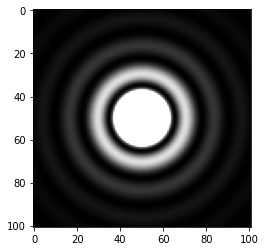

In [6]:
# Exercise 5.4

from math import sin,cos,sqrt,pi
from matplotlib.pylab import plot,imshow,show,gray
from numpy import empty

def f(theta,m,x):
  return cos(m*theta-x*sin(theta))

# Bessel function with Simpson's rule
def J(m,x,N=1000):
  a = 0.0
  b = pi
  h = (b-a)/N

  s1 = 0.0
  for k in range(1,N,2):
    s1 += f(a+k*h,m,x)

  s2 = 0.0
  for k in range(2,N,2):
    s2 += f(a+k*h,m,x)

  return (f(a,m,x)+f(b,m,x)+4*s1+2*s2)*h/(3*pi)

# Main program
# constants
wavelength = 500e-9
k = 2*pi/wavelength

maxr = 1e-6
n = 100
d = 2*maxr/n

N = 1000

# Make array for density plot
dp = empty([n+1,n+1],float)

# Fill array with values
for i in range(n+1):
  x = d*(i-n//2)
  for j in range(n+1):
    if i==n//2 and j==n//2:
      dp[i,j] = 0.25
    else:
      y = d*(j-n//2)
      r = sqrt(x*x+y*y)
      dp[i,j] = (J(1,k*r,N)/(k*r))**2

# Make density plot
imshow(dp,vmax=0.005)
gray()
show()

Exercise 5.10

At position a, T = 0 so V(a) = E and then
V(a) = $\frac{1}{2} m(\frac{dx}{dt})^2$ + V(x)

V(a) - V(x) = $\frac{1}{2} m(\frac{dx}{dt})^2$ and $\frac{2}{m}(V(a) - V(x)) = (\frac{dx}{dt})^2$

$\sqrt{\frac{2}{m}(V(a) - V((x)} = \frac{dx}{dt}$

$\sqrt{(V(a) - V((x)} = \sqrt{\frac{m}{2}}\frac{dx}{dt}$

$1 = \frac{1}{\sqrt{(V(a) - V((x)}} \sqrt{\frac{m}{2}}\frac{dx}{dt}$

But we have to be careful. We took a square root and could have had a positive or negative value inside. If $x=a > 0$, then the velocity is negative, so we really want

$1 = \frac{-1}{\sqrt{(V(a) - V((x)}} \sqrt{\frac{m}{2}}\frac{dx}{dt}$

Now we integrate both sides with respect to t from t = 0 to = T/4, with x(t=0) = a and x(t=T/4) = 0:

$T/4 = -\sqrt{\frac{m}{2}} \int_{x=a}^{x=0} \frac{1}{\sqrt{(V(a) - V((x)}} dx$

$T = \sqrt{8m} \int_{x=0}^{x=a} \frac{1}{\sqrt{(V(a) - V((x)}} dx$



In [1]:
# Gaussian Integration code from the textbook online resource
######################################################################
#
# Functions to calculate integration points and weights for Gaussian
# quadrature
#
# x,w = gaussxw(N) returns integration points x and integration
#           weights w such that sum_i w[i]*f(x[i]) is the Nth-order
#           Gaussian approximation to the integral int_{-1}^1 f(x) dx
# x,w = gaussxwab(N,a,b) returns integration points and weights
#           mapped to the interval [a,b], so that sum_i w[i]*f(x[i])
#           is the Nth-order Gaussian approximation to the integral
#           int_a^b f(x) dx
#
# This code finds the zeros of the nth Legendre polynomial using
# Newton's method, starting from the approximation given in Abramowitz
# and Stegun 22.16.6.  The Legendre polynomial itself is evaluated
# using the recurrence relation given in Abramowitz and Stegun
# 22.7.10.  The function has been checked against other sources for
# values of N up to 1000.  It is compatible with version 2 and version
# 3 of Python.
#
# Written by Mark Newman <mejn@umich.edu>, June 4, 2011
# You may use, share, or modify this file freely
#
######################################################################

from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# We added this one
def integrateGauss(N,a,b,f):
    integral = 0.0
    ## get the sample points and optimal weights
    x,w = gaussxwab(N,a,b)

    # Now we use these in the integration
    for k in range(N):
      integral = integral+w[k]*f(x[k])
    return integral


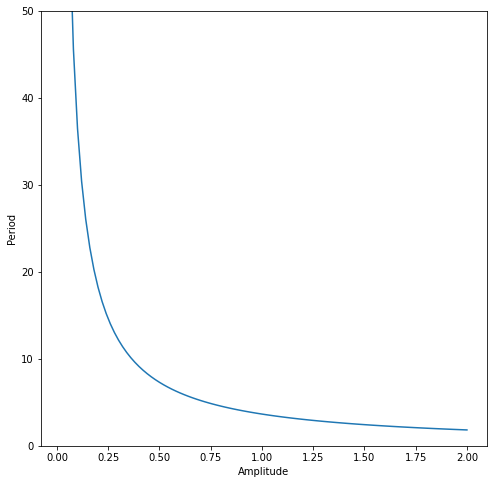

In [23]:
# Exercise 5.10 

from math import sqrt
from numpy import arange
from matplotlib.pylab import plot,show,xlabel,ylabel,ylim,figure

m = 1.0
N = 20

def V(x):
  return x**4

def f(x,Va):
  return(1./(sqrt(Va-V(x))))

# Redefine this to take extra parameter
def integrateGauss_new(N,a,b,f,Va):
    integral = 0.0
    ## get the sample points and optimal weights
    x,w = gaussxwab(N,a,b)

    # Now we use these in the integration
    for k in range(N):
      integral = integral+w[k]*f(x[k],Va)
    return sqrt(8*m)*integral

def T(a):
  Va = V(a)
  return(integrateGauss_new(N,0,a,f,Va))

apoints = arange(2,0,-0.02)
periods=[]
for point in apoints:
  periods.append(T(point))

figure(figsize=(8,8))
plot(apoints,periods)
xlabel("Amplitude")
ylabel("Period")
ylim(0,50)
show()



A harmonic oscillator has a constant period regardless of amplitude. Here, the potential energy function is steeper at the edges, meaning that for a given amplitude, the oscillator travels even faster than for a harmonic oscillator, so the period actually gets shorter when we increase the amplitude! A bit counter-intuitive. When we decrease the amplitude to zero, the oscillator travels more and more slowly, and takes longer and longer.

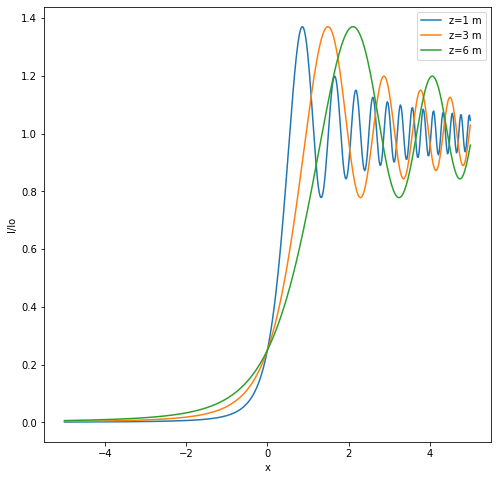

In [34]:
# Exercise 5.11
from numpy import linspace,array
from numpy import sin,cos,sqrt,pi
from matplotlib.pyplot import plot,show,xlabel,ylabel,figure,legend

wavelength = 1
N = 50

def Cf(t):
  return cos(0.5*pi*t*t)

def Sf(t):
  return sin(0.5*pi*t*t)

## Calculate intensity as a function of x 
def I(x):
  u = x*sqrt(2/(wavelength*z))
  Cintegral = integrateGauss(N,0,u,Cf)
  Sintegral = integrateGauss(N,0,u,Sf)
  return (1./8)*((2*Cintegral+1)**2+(2*Sintegral+1)**2)

xpoints = linspace(-5,5,500)
Ipoints_z1 = []
Ipoints_z3 = []
Ipoints_z6 = []

for x in xpoints:
  z = 1 
  Ipoints_z1.append(I(x))
  z = 3 
  Ipoints_z3.append(I(x))
  z = 6
  Ipoints_z6.append(I(x))

figure(figsize=(8,8))
plot(xpoints,Ipoints_z1,label="z=1 m")
plot(xpoints,Ipoints_z3,label="z=3 m")
plot(xpoints,Ipoints_z6,label="z=6 m")
xlabel("x")
ylabel("I/Io")
legend()
show()

Sound intensity is ~0 at negative x, ie behind the straight edge, though it starts to rise before x = 0 due to the spreading out of the plane wave. When z is larger, the wave has more time to spread out and so the intensity rises from zero at more negative x. The opposite is true when z is smaller. And for larger z the peak is shifted further back in x. At z approaches zero the peak appears at x=0.

5.14
a) If we consider an infinitesimal amount of mass, it is $\rho dx dy$. 

The magnitude of its gravitational pull is $G \phi dx dy/r^2$. Symmetry arguments tell us that the total net gravitational force is only in the $-\hat{z}$ direction. 

The component of the infinitesimal amount of mass in that direction is $G \sigma dx dy/r^2 * cos(\theta)$ where $\theta$ is the angle to the z axis, which $z/r$, and $\sigma$ is a the mass per unit area.

So $dF_z = G\sigma \frac{z}{r^3}dxdy$. And then up to the minus sign the total force is the integral of this:

$F_z = \int G\sigma\frac{z}{r^3}dx dy =  G\sigma z\int\frac{dxdy}{(x^2+y^2+z^2)^{3/2}}$ where the limits of integration for each variable run from -L/2 to L/2

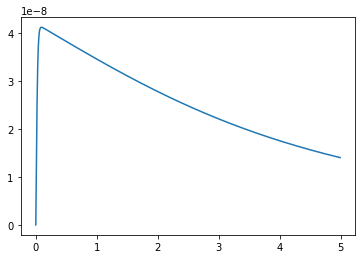

In [38]:
from numpy import arange
from matplotlib.pyplot import plot,show

zmin = 0.0
zmax = 5.0
zstep = 0.01

N = 200
L = 10.0
G = 6.674e-11
sigma = 100.0 

x,w = gaussxwab(N,-L/2,L/2)

def f(z):
  integral = 0.0
  for i in range(N):
    for j in range(N):
      integral += w[i]*w[j] / ((x[i]**2 + x[j]**2 + z**2)**(3/2)) ### x[j] is the y position
  return G*sigma*z*integral

zpoints = arange(zmin,zmax,zstep)
fpoints = []
for z in zpoints:
  fpoints.append(f(z))

plot(zpoints,fpoints)
show()

Looks about right... until we get to very small values of z. What's happening there? Well, we are dominated by the attraction of nearby points on the plate, close to the origin, but there may not be any integration points there. We can try and increase the number of points, but a better way to deal with this would be to change variables